# Pandas 学习笔记

* 版本号： 0.4
* 创建时间： 2015年02月07日 星期六 10:26:33 CST
* 修改时间： 2024年04月16日
* 数据来源：
 * movies.csv http://boxofficemojo.com/daily/
 * iris.csv https://github.com/dsaber/py-viz-blog
 * titanic.csv https://github.com/dsaber/py-viz-blog
 * ts.csv https://github.com/dsaber/py-viz-blog

## 一些准备工作

In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from pandas import Series, DataFrame
from pathlib import Path

# 辅助函数

def get_titanic_df():
    return pd.read_csv('datas/titanic.csv')

def get_iris_df():
    return pd.read_csv('datas/iris.csv')

def get_tips_df():
    return pd.read_csv('datas/tips.csv')

def get_random_df():
    return pd.DataFrame(
        np.random.randn(6, 4),
        index=pd.date_range('20200101', periods=6),
        columns=list('ABCD'))

## 安装使用
2020年1月更新:

* jupyter 已经进化出 `jupyter-lab` 了。

2018年更新:

ipython notebook 已更名为 jupyter notebook 。安装使用方法如下：

* 安装 anaconda ，anaconda 是一个 Python 发行版。装好后就已经包含 `pandas` 和 `jupyter notebook` 。
* 运行 `jupyter notebook` 命令就可以使用 jupyter notebook 。
* 要在 notebook 即时显示图表，可以使用在 notebook 中使用 `%matplotlib inline` 命令。

下面是以前的安装使用方法：

* 安装 pandas
```shell
sudo apt-get install build-essential python-dev
sudo apt-get install python-pandas python-tk
sudo apt-get install python-scipy python-matplotlib python-tables
sudo apt-get install python-numexpr python-xlrd python-statsmodels
sudo apt-get install python-openpyxl python-xlwt python-bs4
```    
if use virtualenv before install matplotlib should install libpng-dev, libjpeg8-dev, libfreetype6-dev

* 安装 ipython-notebook
```shell
sudo pip install "ipython[notebook]"
sudo pip install pygments
```
* 使用``ipython notebook``运行 ipython-notebook 。如果使用matplotlib内嵌进网页中,那么需要运行:`ipython notebook --matplotlib inline` ；或者在已经打开的 notebook 中运行 `%matplotlib inline` 命令。

In [164]:
# 查看 pandas 的版本
# pd.__version__
# 查看当前环境涉及软件的版本
# pd.show_versions()

## DataFrame 速览

### 创建

In [165]:
data = {
    'fruit': ['Apple', 'Apple', 'Apple', 'Grape', 'Grape', 'Grape'],
    'year': [2017, 2018, 2019, 2017, 2018, 2019],
    'price': [20.5, 21.3, 25, 10.1, 10.9, 9.98]
}
frame = DataFrame(data)
frame

,fruit,year,price
0,Apple,2017,20.50
1,Apple,2018,21.30
2,Apple,2019,25.00
3,Grape,2017,10.10
4,Grape,2018,10.90
5,Grape,2019,9.98


生成时指定 columns 和 index ，index 的长度要与行数相匹配

In [166]:
frame2 = DataFrame(
    data,
    columns = ['year', 'month', 'fruit', 'price'],
    index = ['one', 'two', 'three', 'four', 'five', 'six']
)
frame2

,year,month,fruit,price
one,2017,NaN,Apple,20.50
two,2018,NaN,Apple,21.30
three,2019,NaN,Apple,25.00
four,2017,NaN,Grape,10.10
five,2018,NaN,Grape,10.90
six,2019,NaN,Grape,9.98


### 查看数据

通过类似字典标记的方式或属性的方式,可以将 `DataFrame` 的列获取为一个 `Series` 。
IPython 提供了类似属性的访问(即frame2.year)和tab补全。
frame2[column] 适用于任何列的名,但是 frame2.column 只有在列名是一个合理
的 Python 变量名时才适用。
注意,返回的 Series 拥有原 DataFrame 相同的索引,且其 name 属性也已经被相应地
设置好了。

In [167]:
frame2['fruit']

one      Apple
two      Apple
three    Apple
four     Grape
five     Grape
six      Grape
Name: fruit, dtype: object

In [168]:
frame2.year

one      2017
two      2018
three    2019
four     2017
five     2018
six      2019
Name: year, dtype: int64

In [169]:
frame2.loc['two']

year      2018
month      NaN
fruit    Apple
price     21.3
Name: two, dtype: object

### 修改数据

In [170]:
frame2.month = 11
frame2

,year,month,fruit,price
one,2017,11,Apple,20.50
two,2018,11,Apple,21.30
three,2019,11,Apple,25.00
four,2017,11,Grape,10.10
five,2018,11,Grape,10.90
six,2019,11,Grape,9.98


In [171]:
frame2.month = np.arange(6)
frame2

,year,month,fruit,price
one,2017,0,Apple,20.50
two,2018,1,Apple,21.30
three,2019,2,Apple,25.00
four,2017,3,Grape,10.10
five,2018,4,Grape,10.90
six,2019,5,Grape,9.98


DataFrame 的切片是 DataFrame 的视图，不是副本。对切片赋值会改变 DataFrame
本身。

In [172]:
c_month = frame2['month']
c_month

one      0
two      1
three    2
four     3
five     4
six      5
Name: month, dtype: int64

In [173]:
month = Series([1,3,5], index=['one', 'three', 'five'])
frame2['month'] = month
frame2

,year,month,fruit,price
one,2017,1.0,Apple,20.50
two,2018,NaN,Apple,21.30
three,2019,3.0,Apple,25.00
four,2017,NaN,Grape,10.10
five,2018,5.0,Grape,10.90
six,2019,NaN,Grape,9.98


In [174]:
# c_month['two'] = 2.2 
# 这种方式也能改写值，但是因为性能的问题不推荐使用，详见：
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
frame2.loc['two', 'month'] = 2.2
frame2

,year,month,fruit,price
one,2017,1.0,Apple,20.50
two,2018,2.2,Apple,21.30
three,2019,3.0,Apple,25.00
four,2017,NaN,Grape,10.10
five,2018,5.0,Grape,10.90
six,2019,NaN,Grape,9.98


### 删除数据

In [175]:
del frame2['month'] #  删除 column
frame2

,year,fruit,price
one,2017,Apple,20.50
two,2018,Apple,21.30
three,2019,Apple,25.00
four,2017,Grape,10.10
five,2018,Grape,10.90
six,2019,Grape,9.98


## pandas 的索引对象

In [176]:
nums = Series(range(3), index=['one', 'two', 'three'])

In [177]:
num_index = nums.index

In [178]:
num_index

Index(['one', 'two', 'three'], dtype='object')

In [179]:
num_index[1:]

Index(['two', 'three'], dtype='object')

索引对象是不可变的，不能对其赋值

In [180]:
num_index2 = pd.Index(['one', 'two', 'three'])

In [181]:
num_index is num_index2

False

In [182]:
num_index == num_index2

array([ True,  True,  True])

In [183]:
nums2= Series(range(3), index = num_index2)

In [184]:
nums2

one      0
two      1
three    2
dtype: int64

In [185]:
nums2.index is num_index2

True

In [186]:
nums2.index == num_index2

array([ True,  True,  True])

In [187]:
frame3 = get_random_df()

In [188]:
frame3.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [189]:
frame3.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

### reindex

#### Series reindex

In [190]:
obj = Series(range(4), index=['a', 'c', 'd', 'b'])
obj

a    0
c    1
d    2
b    3
dtype: int64

In [191]:
obj2 = obj.reindex(['a', 'b', 'c', 'd'])

In [192]:
obj2

a    0
b    3
c    1
d    2
dtype: int64

#### 自动填充

In [193]:
obj3 = Series(['red', 'blue', 'yellow'], index=[1,3,5])

In [194]:
obj3

1       red
3      blue
5    yellow
dtype: object

In [195]:
obj3.reindex(range(6), method='ffill')

0       NaN
1       red
2       red
3      blue
4      blue
5    yellow
dtype: object

#### Frame reindex

In [196]:
range(5)

range(0, 5)

In [197]:
df = pd.DataFrame(
        np.random.randn(6, 4),
        index=range(6),
        columns=list('ABCD'))
df

,A,B,C,D
0,-1.870282,1.847236,1.060884,-0.962755
1,0.639969,1.395878,-1.609093,-0.000310
2,1.262852,0.930063,-0.288271,-1.647747
3,1.844337,-0.448772,1.115280,-0.033701
4,0.095214,-0.154165,-0.941797,-0.515162
5,-0.642843,1.988245,0.806943,-0.834752


In [198]:
df.reindex(range(5,-1,-1), columns=['A', 'C', 'DDD'])

,A,C,DDD
5,-0.642843,0.806943,NaN
4,0.095214,-0.941797,NaN
3,1.844337,1.115280,NaN
2,1.262852,-0.288271,NaN
1,0.639969,-1.609093,NaN
0,-1.870282,1.060884,NaN


#### drop

In [199]:
df.drop('D', axis='columns') #  不修改对象

,A,B,C
0,-1.870282,1.847236,1.060884
1,0.639969,1.395878,-1.609093
2,1.262852,0.930063,-0.288271
3,1.844337,-0.448772,1.115280
4,0.095214,-0.154165,-0.941797
5,-0.642843,1.988245,0.806943


In [200]:
df

,A,B,C,D
0,-1.870282,1.847236,1.060884,-0.962755
1,0.639969,1.395878,-1.609093,-0.000310
2,1.262852,0.930063,-0.288271,-1.647747
3,1.844337,-0.448772,1.115280,-0.033701
4,0.095214,-0.154165,-0.941797,-0.515162
5,-0.642843,1.988245,0.806943,-0.834752


In [201]:
df.drop('D', axis='columns', inplace=True) #  修改对象

In [202]:
df

,A,B,C
0,-1.870282,1.847236,1.060884
1,0.639969,1.395878,-1.609093
2,1.262852,0.930063,-0.288271
3,1.844337,-0.448772,1.115280
4,0.095214,-0.154165,-0.941797
5,-0.642843,1.988245,0.806943


## DataFrames 创建

In [203]:
dates = pd.date_range('20180101', periods=6);dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [204]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'));df

,A,B,C,D
2018-01-01,1.863653,0.053990,-1.256914,1.474340
2018-01-02,-0.164327,0.211501,0.323222,-0.002627
2018-01-03,0.254398,-0.622240,0.329015,0.245014
2018-01-04,-0.496644,0.955061,1.403011,-0.370782
2018-01-05,-0.065887,0.570067,1.524579,-0.854202
2018-01-06,1.132634,0.529680,0.117496,0.880622


In [205]:
# 可以使用字典来创建 DataFrame 。
# 如果字典的 Value 是单一值，那么会自动扩展。
# 如果字典的 Value 是列表或者 Series ，那么长度要保持一致。
# 如果字典中只有一个值有 Index ，那么会使用这个 Index 作为整个 DataFrame 的 Index 。
# 如果字典有多个 Index ，那么必须保持一致，否则会报错。
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=list(range(2,6)),dtype='float32'), 
      'D' : np.array([3] * 4,dtype='int32'), 
      'E' : pd.Categorical(["test","train","test","train"]), 
      'F' : 'foo' }
)
df2

,A,B,C,D,E,F
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo
4,1.0,2013-01-02,1.0,3,test,foo
5,1.0,2013-01-02,1.0,3,train,foo


In [206]:
data = {
    'fruit': ['Apple', 'Apple', 'Apple', 'Grape', 'Grape', 'Grape'],
    'year': [2017, 2018, 2019, 2017, 2018, 2019],
    'price': [20.5, 21.3, 25, 10.1, 10.9, 9.98]
}
frame = DataFrame(data)

## DataFrame 全局操作

In [207]:
df = get_random_df()

In [208]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [209]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [210]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [211]:
df.values

array([[-0.8430307 ,  0.16365112,  0.34819952,  0.1816034 ],
       [-0.2527771 ,  0.35288587, -1.31084768,  0.96593095],
       [-0.98246094, -0.24233779, -1.70510314, -0.07605717],
       [-0.34124125,  1.70597412, -0.46188374,  0.49084553],
       [-0.17822249,  0.24639153,  0.16107507,  0.22037991],
       [ 2.14574608,  1.18792989,  0.75582046,  0.1645418 ]])

In [212]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.075331,0.569082,-0.368790,0.324541
std,1.136505,0.727893,0.973802,0.362325
min,-0.982461,-0.242338,-1.705103,-0.076057
25%,-0.717583,0.184336,-1.098607,0.168807
50%,-0.297009,0.299639,-0.150404,0.200992
75%,-0.196861,0.979169,0.301418,0.423229
max,2.145746,1.705974,0.755820,0.965931


In [213]:
df.T

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06
A,-0.843031,-0.252777,-0.982461,-0.341241,-0.178222,2.145746
B,0.163651,0.352886,-0.242338,1.705974,0.246392,1.187930
C,0.348200,-1.310848,-1.705103,-0.461884,0.161075,0.755820
D,0.181603,0.965931,-0.076057,0.490846,0.220380,0.164542


## 读入数据

### 从  CSV 文件读入数据

In [214]:
# 读入 CSV 格式数据
df_movies = pd.read_csv('datas/movies.csv', sep='\t', encoding='utf-8')
df_movies.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,"$26,168,351",American Sniper,"$9,905,616"
1,2,Jan. 31,Sat,31,"$41,633,588",American Sniper,"$16,510,536"
2,3,Feb. 1,Sun,32,"$12,515,579",American Sniper,"$4,244,376"
3,4,Feb. 2,Mon,33,"$6,475,068",American Sniper,"$2,645,109"
4,5,Feb. 3,Tue,34,"$7,825,091",American Sniper,"$2,923,141"


In [215]:
df_movies = pd.read_csv('datas/movies.csv', sep='\t', encoding='utf-8',thousands=',',escapechar='$')
df_movies.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


### 读取目录下所有CSV，合并为1个DataFrame，去重

In [216]:
source_path = Path('./datas')
csv_files = source_path.glob('*.csv')
dfs = [pd.read_csv(item, encoding='utf8', dtype="string") for item in csv_files]
df = pd.concat(dfs).drop_duplicates()
#df.head(3)

### 从数据库读入数据
参见：http://stackoverflow.com/questions/10065051/python-pandas-and-databases-like-mysql

### 从 Excel 文件读入数据

#### 原型

```python
pandas.read_excel(io, sheet_name=0, header=0, skiprows=None, skip_footer=0,
                  index_col=None, names=None, usecols=None, parse_dates=False,
                  date_parser=None, na_values=None, thousands=None,
                  convert_float=True, converters=None, dtype=None,
                  true_values=None, false_values=None, engine=None,
                  squeeze=False, **kwds)
```
Read an Excel table into a pandas DataFrame

示例：
```python
# 读入 Excel 文件，所有字段都是 str
df = pd.read_excel(source_file, dtype="string")
```

## 选择数据

1. 行，列 --> df[]
1. 区域 --> df.loc[], df.iloc[], df.ix[]
1. 单元格 --> df.at[], df.iat[]

### 选择单个数据

In [217]:
df=get_random_df();df

,A,B,C,D
2020-01-01,-0.127414,0.402208,-1.621377,-0.706600
2020-01-02,0.427348,-0.576915,-0.719638,-1.058799
2020-01-03,-0.466531,1.123756,-0.884415,2.203494
2020-01-04,-0.249747,-0.367119,-1.423965,0.971523
2020-01-05,-0.879580,1.904772,0.470134,1.533346
2020-01-06,3.046705,-1.288350,-1.219871,-0.800774


In [218]:
df.at['2020-01-01', 'B']

0.40220819245805306

In [219]:
df.iat[1,1]

-0.5769150159100832

### 选择某个区域

In [220]:
#只显示指定的行和列
df.iloc[[1,3,5],[0,1,2,3]]

,A,B,C,D
2020-01-02,0.427348,-0.576915,-0.719638,-1.058799
2020-01-04,-0.249747,-0.367119,-1.423965,0.971523
2020-01-06,3.046705,-1.288350,-1.219871,-0.800774


In [221]:
df.loc[['2020-01-01','2020-01-04','2020-01-06'],['A', 'C']]

,A,C
2020-01-01,-0.127414,-1.621377
2020-01-04,-0.249747,-1.423965
2020-01-06,3.046705,-1.219871


### 选择行

In [222]:
df = get_titanic_df()
df = df[['survived', 'age', 'deck', 'class']]
df[1:4] # 第2-4行

,survived,age,deck,class
1,1,38.0,C,First
2,1,26.0,NaN,Third
3,1,35.0,C,First


In [223]:
# 查看头部数据
df.head()

,survived,age,deck,class
0,0,22.0,NaN,Third
1,1,38.0,C,First
2,1,26.0,NaN,Third
3,1,35.0,C,First
4,0,35.0,NaN,Third


In [224]:
# 查看尾部数据
df.tail(2)
#head 和 tail 接受一个整数参数，缺省值为 5 。

,survived,age,deck,class
889,1,26.0,C,First
890,0,32.0,NaN,Third


In [225]:
# 选择 deck 为空值的行
df[df['deck'].isnull()].head()

,survived,age,deck,class
0,0,22.0,NaN,Third
2,1,26.0,NaN,Third
4,0,35.0,NaN,Third
5,0,NaN,NaN,Third
7,0,2.0,NaN,Third


In [226]:
df[df.deck.isna()].head()

,survived,age,deck,class
0,0,22.0,NaN,Third
2,1,26.0,NaN,Third
4,0,35.0,NaN,Third
5,0,NaN,NaN,Third
7,0,2.0,NaN,Third


In [227]:
# 选择 deck 为非空值的行
df[df.deck.notnull()].head()

,survived,age,deck,class
1,1,38.0,C,First
3,1,35.0,C,First
6,0,54.0,E,First
10,1,4.0,G,Third
11,1,58.0,C,First


In [228]:
# 根据条件过滤
df[(df['class'] == 'First') | (df.deck == 'E') ].head()

,survived,age,deck,class
1,1,38.0,C,First
3,1,35.0,C,First
6,0,54.0,E,First
11,1,58.0,C,First
23,1,28.0,A,First


In [229]:
df[ (df['class'] == 'First') & (df.deck == 'D') & (df.age < 30)].head()

,survived,age,deck,class
97,1,23.0,D,First
102,0,21.0,D,First
136,1,19.0,D,First
393,1,23.0,D,First
627,1,21.0,D,First


### 选择列

In [230]:
df = get_titanic_df()
df[['survived', 'age', 'deck', 'class']].head()

,survived,age,deck,class
0,0,22.0,NaN,Third
1,1,38.0,C,First
2,1,26.0,NaN,Third
3,1,35.0,C,First
4,0,35.0,NaN,Third


In [231]:
df.iloc[:,[1, 2, 6]].head()

,pclass,sex,fare
0,3,male,7.2500
1,1,female,71.2833
2,3,female,7.9250
3,1,female,53.1000
4,3,male,8.0500


In [232]:
# 只包含指定字符的列
df.filter(regex='s', axis=1).head()

,survived,pclass,sex,sibsp,class
0,0,3,male,1,Third
1,1,1,female,1,First
2,1,3,female,0,Third
3,1,1,female,1,First
4,0,3,male,0,Third


In [233]:
# 根据列类型过滤
# 只选择字符串型的列
df.loc[:, (df.dtypes == np.dtype('O')).values].head()

,sex,embarked,class,who,deck,embark_town,alive
0,male,S,Third,man,NaN,Southampton,no
1,female,C,First,woman,C,Cherbourg,yes
2,female,S,Third,woman,NaN,Southampton,yes
3,female,S,First,woman,C,Southampton,yes
4,male,S,Third,man,NaN,Southampton,no


## 操作单元

### 单个单元赋值

In [234]:
df = get_random_df()
df

,A,B,C,D
2020-01-01,1.148532,0.317324,1.159205,0.767581
2020-01-02,0.006078,-0.933768,1.729512,-0.186436
2020-01-03,0.781555,-0.465289,0.490352,1.365542
2020-01-04,0.010499,0.523784,0.204040,0.082275
2020-01-05,0.221785,-2.691217,0.151030,-1.445744
2020-01-06,-0.405333,-0.838198,-0.493799,-2.455432


In [235]:
# 单元格赋值
# 单个单元格赋值
df.iloc[0, 3] = 0.131211
df.loc['2020-01-02', 'B']= -0.131211
df.head(3)

,A,B,C,D
2020-01-01,1.148532,0.317324,1.159205,0.131211
2020-01-02,0.006078,-0.131211,1.729512,-0.186436
2020-01-03,0.781555,-0.465289,0.490352,1.365542


### 多个单元格赋值

In [236]:
df.loc[df.index[0:2], 'C'] = [100, 200]
df.head(3)

,A,B,C,D
2020-01-01,1.148532,0.317324,100.000000,0.131211
2020-01-02,0.006078,-0.131211,200.000000,-0.186436
2020-01-03,0.781555,-0.465289,0.490352,1.365542


## 操作列

### 调整列的顺序

In [237]:
# 构建 DataFrame
df = pd.DataFrame({'a':[1,2], 'b': [3,4], 'c':[5,6], 'd':[7,8], 'e':[9,10]});df

,a,b,c,d,e
0,1,3,5,7,9
1,2,4,6,8,10


#### 方法一

In [238]:
col_order = ['c', 'a', 'b', 'd']
df = df[col_order]
df

,c,a,b,d
0,5,1,3,7
1,6,2,4,8


#### 方法二

In [239]:
new_df = df.drop('c', axis=1)
new_df.insert(2, 'c', df['c'])
new_df

,a,b,c,d
0,1,3,5,7
1,2,4,6,8


### 打印列类型

In [240]:
df = df_movies.copy()
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Row', 'Day#', 'Top 10 Gross', 'Gross'], object: ['Date', 'Day', '#1 Movie']}

In [241]:
# 打印列类型(清晰打印中文)
types = df.columns.to_series().groupby(df.dtypes).groups
for key, value in types.items():
    print(key,':\t', ','.join(value))

int64 :	 Row,Day#,Top 10 Gross,Gross
object :	 Date,Day,#1 Movie


### 插入列

In [242]:
df = get_random_df()
# 方式一：在末尾添加
df['memo'] = pd.Series('', index=df.index)
df.head(3)

,A,B,C,D,memo
2020-01-01,-0.460849,-2.111140,0.526750,-1.723461,
2020-01-02,-2.075447,0.771671,0.074949,0.419958,
2020-01-03,-1.044952,-0.515388,-1.244958,-0.207565,


In [243]:
# 方式二：在中间插入
df = get_random_df()
df.insert(loc=1, column=u'year', value=u'2015')
df.head(3)

,A,year,B,C,D
2020-01-01,-0.909163,2015,-0.917322,-0.506002,1.088749
2020-01-02,0.237910,2015,-0.330139,-0.185761,-0.282543
2020-01-03,0.644266,2015,-0.552541,0.013399,1.092278


In [244]:
# 根据现有值生成一个新的列
df = get_random_df()
df.insert(loc = 2 , column='A-B', value=df['A'] - df['B'])
df.head(3)

,A,B,A-B,C,D
2020-01-01,0.448350,-0.290054,0.738404,-0.406046,0.308425
2020-01-02,-0.580417,-1.769612,1.189195,1.239757,-0.759034
2020-01-03,-0.043785,0.072310,-0.116096,0.264677,-0.395628


In [245]:
# 根据现有值生成多个新的列
df = df_movies.copy()
def process_date_col(text):
    #根据日期生成月份和日两个新的列
    if pd.isnull(text):
        month = day = np.nan
    else:
        month, day = text.split('.')
    return pd.Series([month, day])

df[[u'month', u'day']] = df.Date.apply(process_date_col)
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,month,day
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,Jan,30
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,Jan,31
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,Feb,1
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109,Feb,2
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141,Feb,3


In [246]:
# 根据现有值生成多个新的列
df = df_movies.copy()
df.head()

def process_date_col(se):
    #根据日期生成月份和日两个新的列
    if pd.isnull(se['Date']):
        se['month'] = se['day'] = np.nan
    else:
        se['month'], se['day'] = se['Date'].split('.')
    return se
df['month'] = df['day'] = np.nan
df_new = df.apply(process_date_col, axis=1)
df_new.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,month,day
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,Jan,30
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,Jan,31
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,Feb,1
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109,Feb,2
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141,Feb,3


### 改变列值

In [247]:
df = get_random_df()
df

,A,B,C,D
2020-01-01,0.455907,0.440170,-0.956345,0.766485
2020-01-02,-0.400386,-0.218492,-0.737315,-0.841963
2020-01-03,-1.036559,-0.701914,1.589558,0.057975
2020-01-04,1.590878,-0.045251,-0.515069,-1.433473
2020-01-05,-0.071407,0.250663,1.714977,0.262407
2020-01-06,0.029585,-0.255554,-1.276931,-1.298129


#### 根据一列的值改变本列的值

In [248]:
# 方法一
# 把 C 列小于 0 的数据设置为 0 
df.loc[df.C < 0, 'C'] = 0
df

,A,B,C,D
2020-01-01,0.455907,0.440170,0.000000,0.766485
2020-01-02,-0.400386,-0.218492,0.000000,-0.841963
2020-01-03,-1.036559,-0.701914,1.589558,0.057975
2020-01-04,1.590878,-0.045251,0.000000,-1.433473
2020-01-05,-0.071407,0.250663,1.714977,0.262407
2020-01-06,0.029585,-0.255554,0.000000,-1.298129


In [249]:
# 根据一列的值改变本列的值
# 方法二
# 把 C 列小于 0 的数据设置为 0 
df['D'] = df['D'].apply(lambda x : 0 if x<0 else x)
df

,A,B,C,D
2020-01-01,0.455907,0.440170,0.000000,0.766485
2020-01-02,-0.400386,-0.218492,0.000000,0.000000
2020-01-03,-1.036559,-0.701914,1.589558,0.057975
2020-01-04,1.590878,-0.045251,0.000000,0.000000
2020-01-05,-0.071407,0.250663,1.714977,0.262407
2020-01-06,0.029585,-0.255554,0.000000,0.000000


#### 同时改变多个列的值

In [250]:
# 把 A B 两列数据均乘以 100
cols = ['A', 'B']
df[cols] = df[cols].applymap(lambda x: x*100)
df

,A,B,C,D
2020-01-01,45.590705,44.016988,0.000000,0.766485
2020-01-02,-40.038550,-21.849155,0.000000,0.000000
2020-01-03,-103.655878,-70.191427,1.589558,0.057975
2020-01-04,159.087823,-4.525098,0.000000,0.000000
2020-01-05,-7.140684,25.066323,1.714977,0.262407
2020-01-06,2.958459,-25.555402,0.000000,0.000000


#### 按条件过滤行，批量修改字段

In [251]:
# A、B 列均小于零的，C 列改为空值
mask = (df['A'] < 0) & (df['B'] < 0)
df.loc[mask, 'C'] = np.nan
df

,A,B,C,D
2020-01-01,45.590705,44.016988,0.000000,0.766485
2020-01-02,-40.038550,-21.849155,NaN,0.000000
2020-01-03,-103.655878,-70.191427,NaN,0.057975
2020-01-04,159.087823,-4.525098,0.000000,0.000000
2020-01-05,-7.140684,25.066323,1.714977,0.262407
2020-01-06,2.958459,-25.555402,0.000000,0.000000


#### 使用字典生成新的列

In [252]:
dict_str = """320281 江阴
320282 宜兴
320213 梁溪"""
# 生成一个字典，key是行政区划代码，value是行政区划名称
dict_rows = [row.split() for row in dict_str.split('\n')]
xzqh_dm_mc = dict([(item[0], item[1]) for item in dict_rows])
xzqh_dm_mc
df['行政区划代码'] = ['320281', '320282', '320283',
                '320281', '320282', '320213']

df['行政区划'] = df['行政区划代码'].map(xzqh_dm_mc)
df

,A,B,C,D,行政区划代码,行政区划
2020-01-01,45.590705,44.016988,0.000000,0.766485,320281,江阴
2020-01-02,-40.038550,-21.849155,NaN,0.000000,320282,宜兴
2020-01-03,-103.655878,-70.191427,NaN,0.057975,320283,NaN
2020-01-04,159.087823,-4.525098,0.000000,0.000000,320281,江阴
2020-01-05,-7.140684,25.066323,1.714977,0.262407,320282,宜兴
2020-01-06,2.958459,-25.555402,0.000000,0.000000,320213,梁溪


### 删除列

In [253]:
df = get_random_df()
df.head()

,A,B,C,D
2020-01-01,-1.587218,0.069797,0.714401,0.381977
2020-01-02,0.671095,-1.255362,-1.335127,0.220457
2020-01-03,-0.551792,0.174548,1.120456,-0.709983
2020-01-04,-0.171354,0.851806,-0.319238,-0.310731
2020-01-05,0.254203,0.074290,-1.541995,0.765277


In [254]:
df.drop(df[['D', 'C']], axis=1, inplace=True)
df.head()

,A,B
2020-01-01,-1.587218,0.069797
2020-01-02,0.671095,-1.255362
2020-01-03,-0.551792,0.174548
2020-01-04,-0.171354,0.851806
2020-01-05,0.254203,0.074290


In [255]:
del df['A']
df.head()

,B
2020-01-01,0.069797
2020-01-02,-1.255362
2020-01-03,0.174548
2020-01-04,0.851806
2020-01-05,0.074290


In [256]:
df = get_random_df()
df.drop(columns=['A', 'C'], axis=1).head()

,B,D
2020-01-01,1.267116,1.102446
2020-01-02,-2.601673,-0.973597
2020-01-03,0.330555,0.101620
2020-01-04,-1.300182,-0.316561
2020-01-05,-0.856983,-0.837295


In [257]:
# 只保留前两列，删除第三列开始的所有列
df = get_random_df()
df.drop(df.columns[2:], axis=1)

,A,B
2020-01-01,1.054027,-1.710003
2020-01-02,-0.895784,0.699684
2020-01-03,-0.906341,1.058156
2020-01-04,-0.534992,-1.327501
2020-01-05,0.460481,-0.613649
2020-01-06,-0.418965,-1.288246


## 操作行

### 添加一个空行

In [258]:
df = get_iris_df()
#df = get_random_df()
new_line = pd.Series([np.nan]*len(df.columns), # Fill cells with NaNs
                     index=df.columns)
# 方法一
df.loc[len(df)]=new_line

# 方法二
new_df = pd.concat([df, new_line.to_frame().T], axis=0, ignore_index=True)

# 方法三
# append 将被废弃
# new_df = df.append(new_line, ignore_index=True)

new_df.tail()

,petalLength,petalWidth,sepalLength,sepalWidth,species
147,5.2,2.0,6.5,3.0,virginica
148,5.4,2.3,6.2,3.4,virginica
149,5.1,1.8,5.9,3.0,virginica
150,NaN,NaN,NaN,NaN,NaN
151,NaN,NaN,NaN,NaN,NaN


### 删除行

In [259]:
# 删除 petalLength 为空的行
new_df[~(new_df['petalLength'].isnull())].tail()

,petalLength,petalWidth,sepalLength,sepalWidth,species
145,5.2,2.3,6.7,3.0,virginica
146,5.0,1.9,6.3,2.5,virginica
147,5.2,2.0,6.5,3.0,virginica
148,5.4,2.3,6.2,3.4,virginica
149,5.1,1.8,5.9,3.0,virginica


In [260]:
# 删除索引为 1 和 5 的行
df = df.drop([1,5])
df.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa
6,1.4,0.3,4.6,3.4,setosa


## apply, applymap, map 区别

* apply：应用在DataFrame的行或列中；
* applymap：应用在DataFrame的每个元素中；
* map：应用在单独一列（Series）的每个元素中。

In [261]:
df = pd.DataFrame(np.random.randn(2, 2), columns=list('AB'));df

,A,B
0,-1.793254,-2.011889
1,-0.904923,-0.594622


In [262]:
# 行的和
df.apply(np.sum)

A   -2.698177
B   -2.606511
dtype: float64

In [263]:
# 列的和
df.apply(np.sum, axis=1)

0   -3.805143
1   -1.499545
dtype: float64

In [264]:
# 保留两位小数
df.applymap(lambda x: '%.2f'%x)

,A,B
0,-1.79,-2.01
1,-0.90,-0.59


In [265]:
# 保留两位小数，只处理某一列，返回一个 DataFrame
df[['A']].applymap(lambda x: '%.2f'%x)

,A
0,-1.79
1,-0.90


In [266]:
# 保留两位小数，只处理某一列，返回一个 Series
df['A'].map(lambda x: '%.2f'%x)

0    -1.79
1    -0.90
Name: A, dtype: object

## 处理字符串

### 把一列字符串拆分为两列

In [267]:
df = pd.DataFrame({"下发数量": ["下发数(6),未下发数（3)", "下发数(16),未下发数（7)"],
                   "下发时间": ["20220118007", "20220120009"]
                  })
df[['下发数', '去重数']] = df['下发数量'].str.extract(r'下发数\((\d+)\),未下发数（(\d+)\)').astype('int')
df

,下发数量,下发时间,下发数,去重数
0,"下发数(6),未下发数（3)",20220118007,6,3
1,"下发数(16),未下发数（7)",20220120009,16,7


In [268]:
firstlast = pd.DataFrame({"String": ["John Smith", "Jane Cook"]})
firstlast["First_Name"] = firstlast["String"].str.split(" ", expand=True)[0]
firstlast["Last_Name"] = firstlast["String"].str.rsplit(" ", expand=True)[1]
firstlast[["First", "Last"]] = firstlast["String"].str.split(" ", expand=True)
firstlast

,String,First_Name,Last_Name,First,Last
0,John Smith,John,Smith,John,Smith
1,Jane Cook,Jane,Cook,Jane,Cook


### 合并字符串

In [269]:
df = pd.DataFrame({
    "First": ["John", "Jane"],
    "Last": ["Smith", np.nan],
    "Age":[12, np.nan]
})
df

,First,Last,Age
0,John,Smith,12.0
1,Jane,NaN,NaN


In [270]:
df['First'].str.cat(df['Last'], sep='.', na_rep='NO_DATA')

0      John.Smith
1    Jane.NO_DATA
Name: First, dtype: object

In [271]:
df['First'].str.cat(df['Age'].astype(str), sep=' - ', na_rep='NO_DATA')

0    John - 12.0
1     Jane - nan
Name: First, dtype: object

In [272]:
df['First'].str.cat([df['Last'], df['Age'].astype(str)], sep=' - ', na_rep='NO_DATA')

0     John - Smith - 12.0
1    Jane - NO_DATA - nan
Name: First, dtype: object

### 对一列字符串进行处理，生成新的列

In [273]:
firstlast = pd.DataFrame({"string": ["John Smith", "Jane Cook"]})
firstlast["upper"] = firstlast["string"].str.upper()
firstlast["lower"] = firstlast["string"].str.lower()
firstlast["title"] = firstlast["string"].str.title()
firstlast

,string,upper,lower,title
0,John Smith,JOHN SMITH,john smith,John Smith
1,Jane Cook,JANE COOK,jane cook,Jane Cook


### 截取字符串

In [274]:
firstlast['title'].str[5:12]

0    Smith
1     Cook
Name: title, dtype: object

### 替换字符串

In [275]:
firstlast['title'].str.replace(
    r'o{2,}',
    'XXXX',
    regex=True
)

0     John Smith
1    Jane CXXXXk
Name: title, dtype: object

## 空值处理（NaN）

In [276]:
# 计数有空值的行
nans = df.shape[0] - df.dropna().shape[0]
print(u'一共有 %d 行出现空值' % nans)

# 填充空值为`无`
df.fillna(value=u'无', inplace=True)
df.tail()

一共有 1 行出现空值


,First,Last,Age
0,John,Smith,12.0
1,Jane,无,无


## 排序

### DataFrame 按列排序

In [277]:
df_ti = get_titanic_df()
df = df_ti[['pclass', 'sex', 'age']]
# 按年龄排序
# df.sort_values('age', ascending=True, inplace=True)
df.sort_values(by='age', ascending=True).head()

,pclass,sex,age
803,3,male,0.42
755,2,male,0.67
644,3,female,0.75
469,3,female,0.75
78,2,male,0.83


In [278]:
df.sort_values(by=['age', 'pclass'], ascending=True)[5:15]

,pclass,sex,age
831,2,male,0.83
305,1,male,0.92
183,2,male,1.00
827,2,male,1.00
164,3,male,1.00
172,3,female,1.00
381,3,female,1.00
386,3,male,1.00
788,3,male,1.00
297,1,female,2.00


In [279]:
# 排序后重新编制索引
df.index = range(1,len(df.index)+1)
df.head()

,pclass,sex,age
1,3,male,22.0
2,1,female,38.0
3,3,female,26.0
4,1,female,35.0
5,3,male,35.0


### Series 排序

#### 按指定顺序排序

In [280]:
dic = {'101': '香蕉', '102': '苹果', '181': '葡萄'}
s = pd.Series(dic)
my_order = ['101', '181', '102']
s.reindex(my_order)

101    香蕉
181    葡萄
102    苹果
dtype: object

#### 按 index 排序

In [281]:
s.sort_index()

101    香蕉
102    苹果
181    葡萄
dtype: object

#### 按值排序

In [282]:
s.sort_values()

102    苹果
181    葡萄
101    香蕉
dtype: object

In [283]:
s.sort_values(ascending=False)

101    香蕉
181    葡萄
102    苹果
dtype: object

##　去重

In [284]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie',pd.NA,pd.NA],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack',pd.NA,pd.NA],
    'rating': [4, 4, 3.5, 15, 5,pd.NA,pd.NA]
})
df

,brand,style,rating
0,Yum Yum,cup,4
1,Yum Yum,cup,4
2,Indomie,cup,3.5
3,Indomie,pack,15
4,Indomie,pack,5
5,<NA>,<NA>,<NA>
6,<NA>,<NA>,<NA>


In [285]:
df.drop_duplicates()  # 所有列相同的去重

,brand,style,rating
0,Yum Yum,cup,4
2,Indomie,cup,3.5
3,Indomie,pack,15
4,Indomie,pack,5
5,<NA>,<NA>,<NA>


In [286]:
df.drop_duplicates(subset=['brand'])  # 按某一列去重

,brand,style,rating
0,Yum Yum,cup,4
2,Indomie,cup,3.5
5,<NA>,<NA>,<NA>


In [287]:
# 按两列去重，保留最后一个
df.drop_duplicates(subset=['brand', 'style'], keep='last') 

,brand,style,rating
1,Yum Yum,cup,4
2,Indomie,cup,3.5
4,Indomie,pack,5
6,<NA>,<NA>,<NA>


## 排名

In [288]:
df = pd.DataFrame(data={'Animal': ['cat', 'penguin', 'dog',
                                   'spider', 'snake'],
                        'Number_legs': [4, 2, 4, 8, np.nan]})
df

,Animal,Number_legs
0,cat,4.0
1,penguin,2.0
2,dog,4.0
3,spider,8.0
4,snake,NaN


In [289]:
df['default_rank'] = df['Number_legs'].rank()
df['max_rank'] = df['Number_legs'].rank(method='max')
df['NA_bottom'] = df['Number_legs'].rank(na_option='bottom')
df['pct_rank'] = df['Number_legs'].rank(pct=True)
df['max_asc_rank'] = df['Number_legs'].rank(method='min', ascending=False)
df

,Animal,Number_legs,default_rank,max_rank,NA_bottom,pct_rank,max_asc_rank
0,cat,4.0,2.5,3.0,2.5,0.625,2.0
1,penguin,2.0,1.0,1.0,1.0,0.250,4.0
2,dog,4.0,2.5,3.0,2.5,0.625,2.0
3,spider,8.0,4.0,4.0,4.0,1.000,1.0
4,snake,NaN,NaN,NaN,5.0,NaN,NaN


## 按年龄分组

In [290]:
datas = [15, 16, 17, 18, 91, 56, 44]
bins = [0, 16, 45, 80, 100]
labels = ['儿童', '青年', '中年', '老年']
age_cut = pd.cut(datas, bins, True,labels)
age_cut

['儿童', '儿童', '青年', '青年', '老年', '中年', '青年']
Categories (4, object): ['儿童' < '青年' < '中年' < '老年']

In [291]:
age_cut.value_counts()

儿童    2
青年    3
中年    1
老年    1
dtype: int64

## 输出示例

In [292]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [293]:
df.to_dict()

{'brand': {0: 'Yum Yum',
  1: 'Yum Yum',
  2: 'Indomie',
  3: 'Indomie',
  4: 'Indomie'},
 'style': {0: 'cup', 1: 'cup', 2: 'cup', 3: 'pack', 4: 'pack'},
 'rating': {0: 4.0, 1: 4.0, 2: 3.5, 3: 15.0, 4: 5.0}}

In [294]:
df.to_records()

rec.array([(0, 'Yum Yum', 'cup',  4. ), (1, 'Yum Yum', 'cup',  4. ),
           (2, 'Indomie', 'cup',  3.5), (3, 'Indomie', 'pack', 15. ),
           (4, 'Indomie', 'pack',  5. )],
          dtype=[('index', '<i8'), ('brand', 'O'), ('style', 'O'), ('rating', '<f8')])

In [295]:
df.to_csv()

',brand,style,rating\n0,Yum Yum,cup,4.0\n1,Yum Yum,cup,4.0\n2,Indomie,cup,3.5\n3,Indomie,pack,15.0\n4,Indomie,pack,5.0\n'

In [296]:
print(df.to_csv())

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0



In [297]:
for i in df.iterrows():
    print(i[0])
    print(type(i[1]))
    print(i[1])

0
<class 'pandas.core.series.Series'>
brand     Yum Yum
style         cup
rating        4.0
Name: 0, dtype: object
1
<class 'pandas.core.series.Series'>
brand     Yum Yum
style         cup
rating        4.0
Name: 1, dtype: object
2
<class 'pandas.core.series.Series'>
brand     Indomie
style         cup
rating        3.5
Name: 2, dtype: object
3
<class 'pandas.core.series.Series'>
brand     Indomie
style        pack
rating       15.0
Name: 3, dtype: object
4
<class 'pandas.core.series.Series'>
brand     Indomie
style        pack
rating        5.0
Name: 4, dtype: object


In [298]:
df.items()

<generator object DataFrame.items at 0x7fe75ca78c80>

In [299]:
for i in df.items():
    print(i)
    print(type(i))

('brand', 0    Yum Yum
1    Yum Yum
2    Indomie
3    Indomie
4    Indomie
Name: brand, dtype: object)
<class 'tuple'>
('style', 0     cup
1     cup
2     cup
3    pack
4    pack
Name: style, dtype: object)
<class 'tuple'>
('rating', 0     4.0
1     4.0
2     3.5
3    15.0
4     5.0
Name: rating, dtype: float64)
<class 'tuple'>


## 图形化

<Axes: >

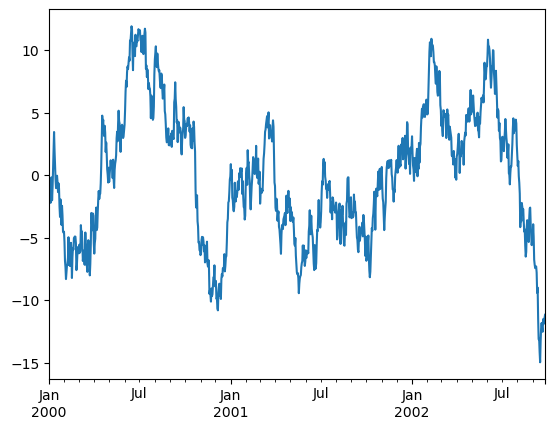

In [300]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Axes: >

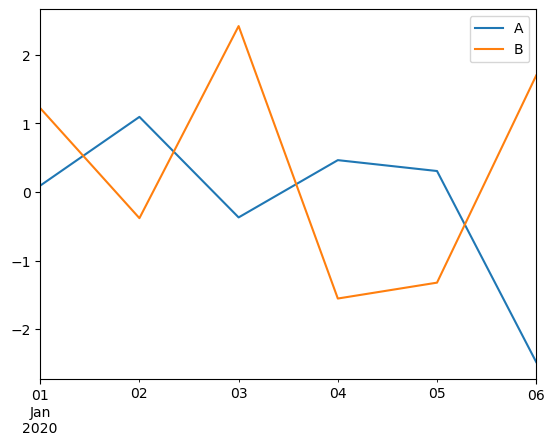

In [301]:
df = get_random_df()
df.plot(y=['A', 'B'])

In [302]:
df_iris = get_iris_df()
df_iris.sample(5)

,petalLength,petalWidth,sepalLength,sepalWidth,species
127,4.9,1.8,6.1,3.0,virginica
134,5.6,1.4,6.1,2.6,virginica
28,1.4,0.2,5.2,3.4,setosa
130,6.1,1.9,7.4,2.8,virginica
51,4.5,1.5,6.4,3.2,versicolor


<Axes: xlabel='petalLength', ylabel='petalWidth'>

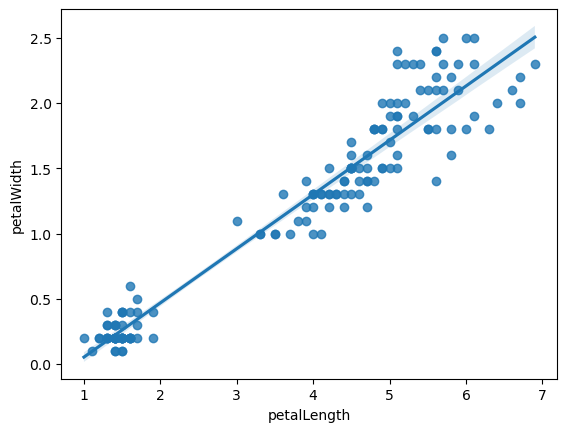

In [303]:
# 线性回归
sns.regplot(x='petalLength', y='petalWidth',data=df_iris)

## 复制数据

复制 Frame 或者 Series 的数据使用 `copy` 方法。

`Signature: df.copy(deep: 'bool_t' = True) -> 'FrameOrSeries'`

参数 `deep` 默认为 `True` 。

In [304]:
df = get_random_df()
df_deep = df.copy()
df_shallow = df.copy(deep=False)
df.iloc[1,1] = 0

In [305]:
df

,A,B,C,D
2020-01-01,1.334778,0.590552,-0.191088,-0.570773
2020-01-02,0.563330,0.000000,-0.388838,1.082667
2020-01-03,-0.395530,0.022657,2.374852,-0.936310
2020-01-04,0.095474,-0.013410,-0.949512,-1.027845
2020-01-05,0.268630,1.993076,0.120371,-0.165745
2020-01-06,-0.026002,0.474532,0.353869,-0.868767


In [306]:
df_deep

,A,B,C,D
2020-01-01,1.334778,0.590552,-0.191088,-0.570773
2020-01-02,0.563330,1.888045,-0.388838,1.082667
2020-01-03,-0.395530,0.022657,2.374852,-0.936310
2020-01-04,0.095474,-0.013410,-0.949512,-1.027845
2020-01-05,0.268630,1.993076,0.120371,-0.165745
2020-01-06,-0.026002,0.474532,0.353869,-0.868767


In [307]:
df_shallow

,A,B,C,D
2020-01-01,1.334778,0.590552,-0.191088,-0.570773
2020-01-02,0.563330,0.000000,-0.388838,1.082667
2020-01-03,-0.395530,0.022657,2.374852,-0.936310
2020-01-04,0.095474,-0.013410,-0.949512,-1.027845
2020-01-05,0.268630,1.993076,0.120371,-0.165745
2020-01-06,-0.026002,0.474532,0.353869,-0.868767


注意：当值为嵌套的结构时，深复制不是递归的。下层原数据变更时也会影响复制后的数据。

In [308]:
s = pd.Series([[1, 2], [3, 4]])
deep = s.copy()
s[0][0] = 10  # 这个会影响复制后的数据
s[1] = [5, 6] # 这个不会影响复制后的数据
s

0    [10, 2]
1     [5, 6]
dtype: object

In [309]:
deep

0    [10, 2]
1     [3, 4]
dtype: object

## 导出数据

### EXCEL

In [310]:
# df.to_excel(output_path)
# 多个 sheet
# with pd.ExcelWriter(output_path) as w:
#     df1.to_excel(w, sheet_name='first_sheet')
#     df2.to_excel(w, sheet_name='second_sheet')

### CSV

In [311]:
# 导出周六的数据，格式为 CSV
# df[ (df['Day'] == 'Sat') ].to_csv('test_tmp.csv', mode='w', encoding='utf-8', index=False)

#在前面的文件中追加周日的数据
# df[ (df['Day'] == 'Sun') ].to_csv('test_output.csv', mode='a', header=False, encoding='utf-8', index=False)

### Dict

In [312]:
# 输出为 dict 格式
# DataFrame.to_dict可以接受 ‘dict’, ‘list’, ‘series’, ‘split’, ‘records’, ‘index’
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [313]:
import pprint
for p in ['dict', 'list', 'series', 'split', 'records', 'index']:
    print(f'Parameters:{p}')
    pprint.pprint(df.to_dict(p))
    print('-----------------------------------------------------')

Parameters:dict
{'AAA': {0: 4, 1: 5, 2: 6, 3: 7},
 'BBB': {0: 10, 1: 20, 2: 30, 3: 40},
 'CCC': {0: 100, 1: 50, 2: -30, 3: -50}}
-----------------------------------------------------
Parameters:list
{'AAA': [4, 5, 6, 7], 'BBB': [10, 20, 30, 40], 'CCC': [100, 50, -30, -50]}
-----------------------------------------------------
Parameters:series
{'AAA': 0    4
1    5
2    6
3    7
Name: AAA, dtype: int64,
 'BBB': 0    10
1    20
2    30
3    40
Name: BBB, dtype: int64,
 'CCC': 0    100
1     50
2    -30
3    -50
Name: CCC, dtype: int64}
-----------------------------------------------------
Parameters:split
{'columns': ['AAA', 'BBB', 'CCC'],
 'data': [[4, 10, 100], [5, 20, 50], [6, 30, -30], [7, 40, -50]],
 'index': [0, 1, 2, 3]}
-----------------------------------------------------
Parameters:records
[{'AAA': 4, 'BBB': 10, 'CCC': 100},
 {'AAA': 5, 'BBB': 20, 'CCC': 50},
 {'AAA': 6, 'BBB': 30, 'CCC': -30},
 {'AAA': 7, 'BBB': 40, 'CCC': -50}]
-----------------------------------------------

## Cheat Sheet

英文：https://www.dataquest.io/blog/pandas-cheat-sheet/

中文翻译：http://blog.csdn.net/qq_33399185/article/details/60872853

## 相关资源

* pandas 英文最新文档 https://pandas.pydata.org/pandas-docs/stable/pandas.pdf